In [ ]:
#Instalamos la libreria para ingresar a google Big Query
#pip install pandas-gbq

In [2]:
import os ,sys ,logging 
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from dateutil.parser import parse

#Definimos la dura de los directorios
from pathlib import Path

current_dir  = Path('.').resolve()
project_dir = Path(current_dir).parent

In [3]:
def graficar (num_df,col,suptitle):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    #Boxplot e histograma, dividimos el eje
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(num_df[col], ax=ax_box)
    sns.histplot(data=num_df, x=col, bins=30, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    plt.suptitle(col)
    ax_hist.grid()


    plot_path = os.path.join(project_dir, 'reports', 'plots', col)
    f.savefig(plot_path)

def correlacionar(padre,hijo):
    #correlacionar
    x=padre
    y=hijo
    return num_df[[x,y]].corr()

In [4]:
#tabla del BigQuery
tabla = '`bigquery-public-data.chicago_taxi_trips.taxi_trips` as t'

#Ojo se usa triple doble comillas
sql = """
SELECT t.* 
FROM {} 
LIMIT 1000
""".format(tabla)

print(sql)


SELECT t.* 
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` as t 
LIMIT 1000



In [5]:
df = pd.read_gbq(sql)
df.head(2)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None


In [6]:
#Toamar solo datos numericos
variables_numericas= ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=variables_numericas)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [7]:
#Estadistica estandar desde python
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

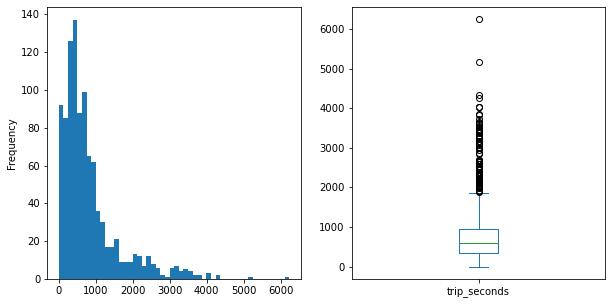

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
#Histograma de los secundo, bins = cantidad de columnas que se deben agrupar , ax  = eje 1
num_df['trip_seconds'].plot(kind='hist',bins=50, ax=ax[0])
#Boxplot de trips_secods,  ax  = eje 2
num_df['trip_seconds'].plot(kind='box', ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


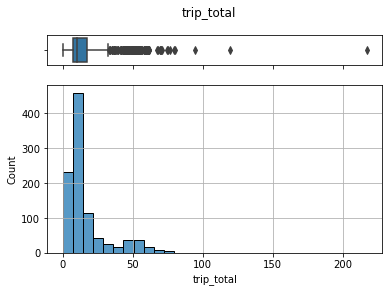

In [9]:
graficar(num_df,'trip_total','trip_total')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

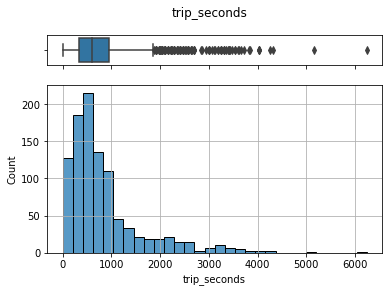

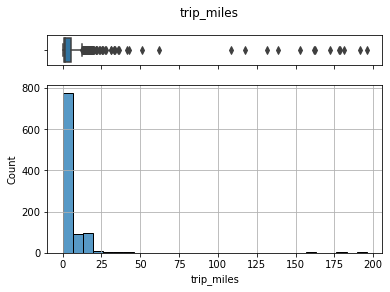

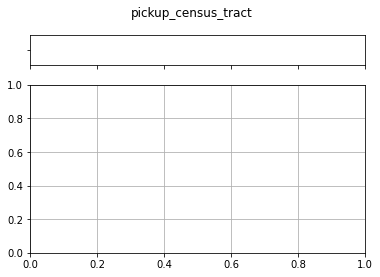

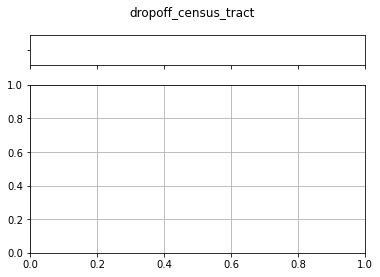

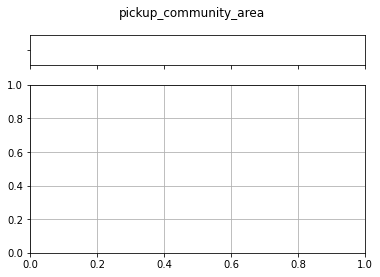

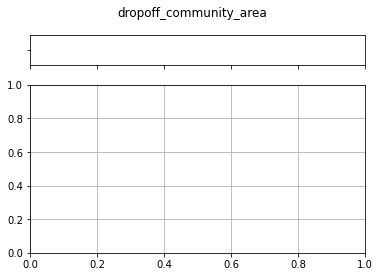

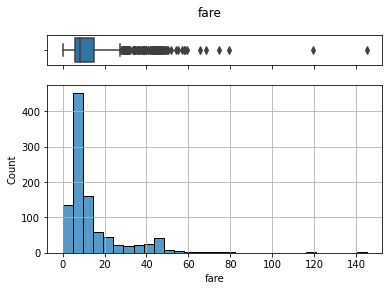

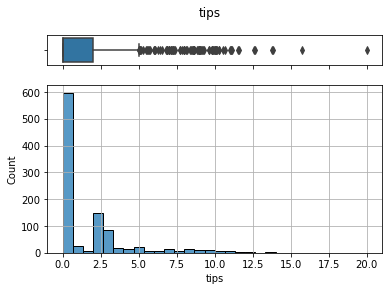

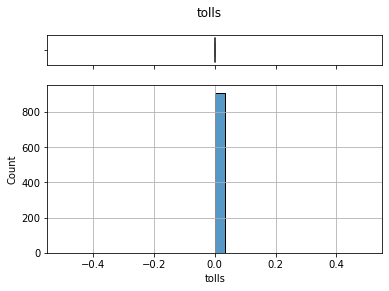

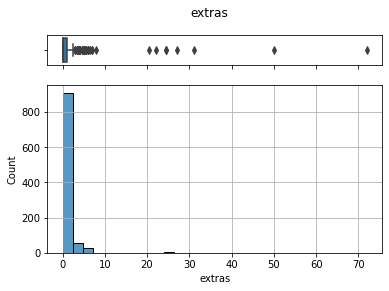

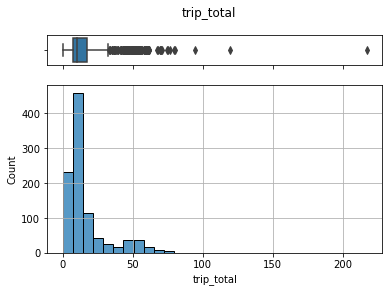

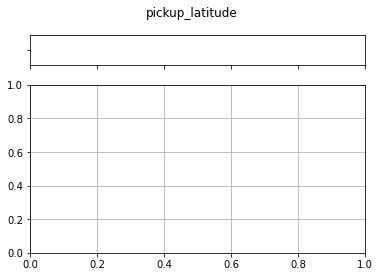

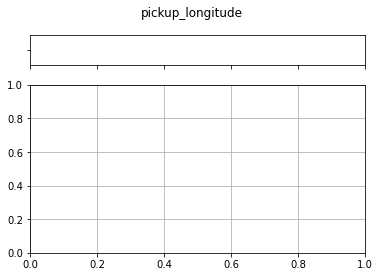

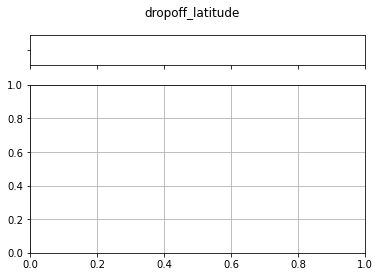

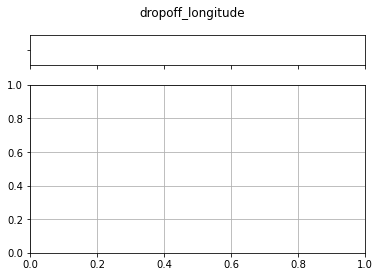

In [10]:
#Tarea 1
#Realizar la grafica de arriba con las demas variables numericas.
num_df.columns


for col in num_df.columns:
    graficar(num_df,col,col);


---
Transformación logaritmica

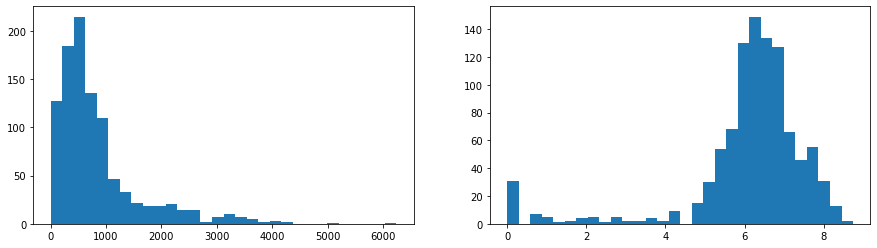

In [11]:
x = num_df['trip_seconds']
log_x = np.log(x+1)

f,ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,bins=30)
ax[1].hist(log_x,bins=30); #El punto y coma, solo imprime el grafico


<AxesSubplot:xlabel='trip_seconds'>

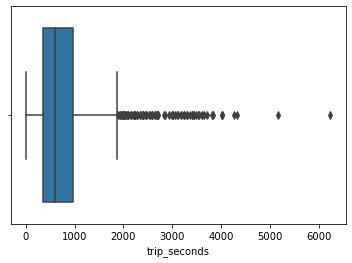

In [12]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

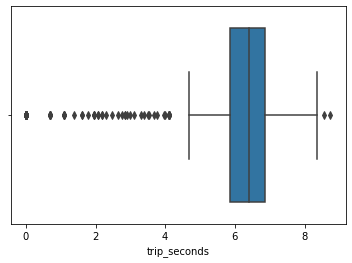

In [13]:
sns.boxplot(log_x)

In [14]:
log_x.describe()

count    1000.000000
mean        6.101627
std         1.595560
min         0.000000
25%         5.853610
50%         6.398595
75%         6.867974
max         8.738896
Name: trip_seconds, dtype: float64

In [15]:
np.exp(log_x.mean())

446.58359990923947

<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

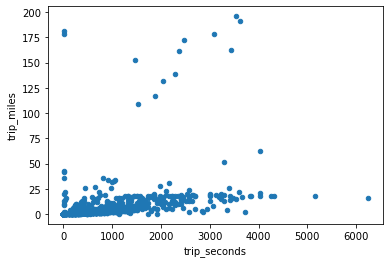

In [16]:
num_df.plot(kind='scatter',x='trip_seconds',y='trip_miles')

(0.0, 10.0)

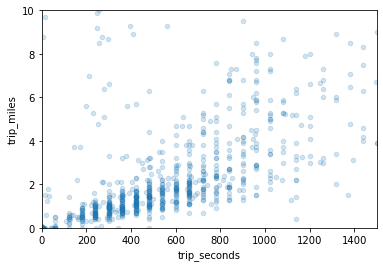

In [17]:
#Difuminar datos, por intensidad
num_df.plot(kind='scatter',x='trip_seconds',y='trip_miles',alpha=0.2)
plt.xlim(0,1500)
plt.ylim(0,10)#Limite en y

¿Qué es una correlación?
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

In [18]:
#correlacionar
x='trip_seconds'
y='trip_miles'
#num_df[[x,y]].corr()

correlacionar('trip_seconds','trip_miles')


,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

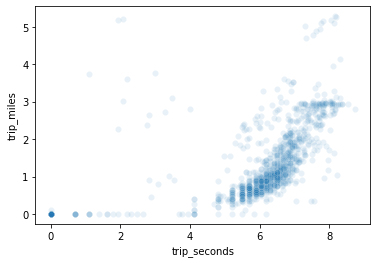

In [19]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)

sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [20]:
#creamos un dataframe solo de logaritmos
log_num_df=pd.DataFrame(columns=[x,y])
log_num_df[x]=log_x #llenamos columnas
log_num_df[y]=log_y

log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


In [21]:
#Taller 2
#Realizar el estudio de correlación de trips_seconds, con las siguientes variables.

#correlacionar
for col in num_df.columns:
    c=correlacionar('trip_seconds',col)
    print("correlación  de trip_seconds vs {}".format(col))
    print(c)
    print("\n")

correlación  de trip_seconds vs trip_seconds
              trip_seconds  trip_seconds
trip_seconds           1.0           1.0
trip_seconds           1.0           1.0


correlación  de trip_seconds vs trip_miles
              trip_seconds  trip_miles
trip_seconds      1.000000    0.388041
trip_miles        0.388041    1.000000


correlación  de trip_seconds vs pickup_census_tract
                     trip_seconds  pickup_census_tract
trip_seconds                  1.0                  NaN
pickup_census_tract           NaN                  NaN


correlación  de trip_seconds vs dropoff_census_tract
                      trip_seconds  dropoff_census_tract
trip_seconds                   1.0                   NaN
dropoff_census_tract           NaN                   NaN


correlación  de trip_seconds vs pickup_community_area
                       trip_seconds  pickup_community_area
trip_seconds                    1.0                    NaN
pickup_community_area           NaN                

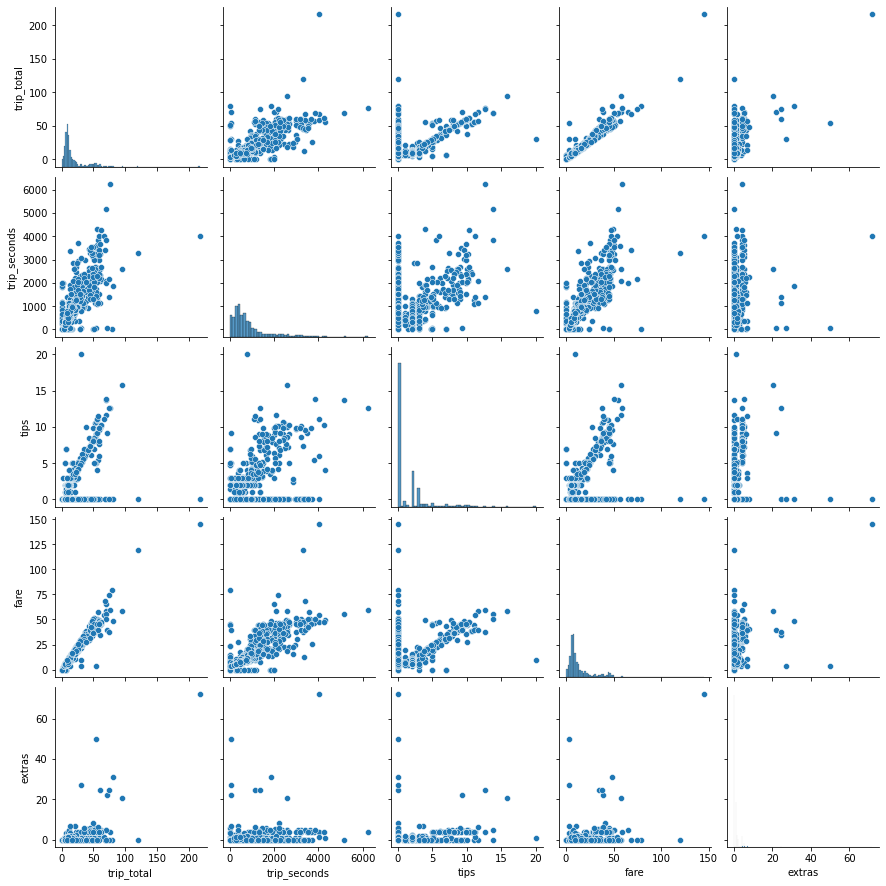

In [22]:
cols = ["trip_total" , "trip_seconds", "tips", "fare", "extras"]
sns.pairplot (data = num_df[cols]) #Relacion de columan con las restantes

<AxesSubplot:>

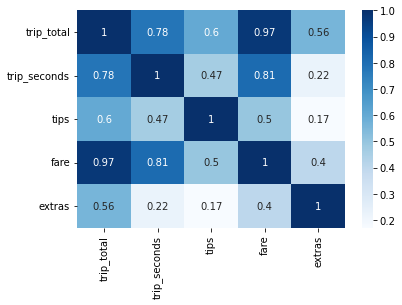

In [24]:
correlations = num_df [cols].corr()
sns.heatmap (correlations, cmap = "Blues", annot= True)

Tarea 3 construir los mismos graficos scatter matriz y mapa de calor aplicando transformacion de logaritmos

para construir la correlacion necesitamos un dataframe para la tarea num_df_log

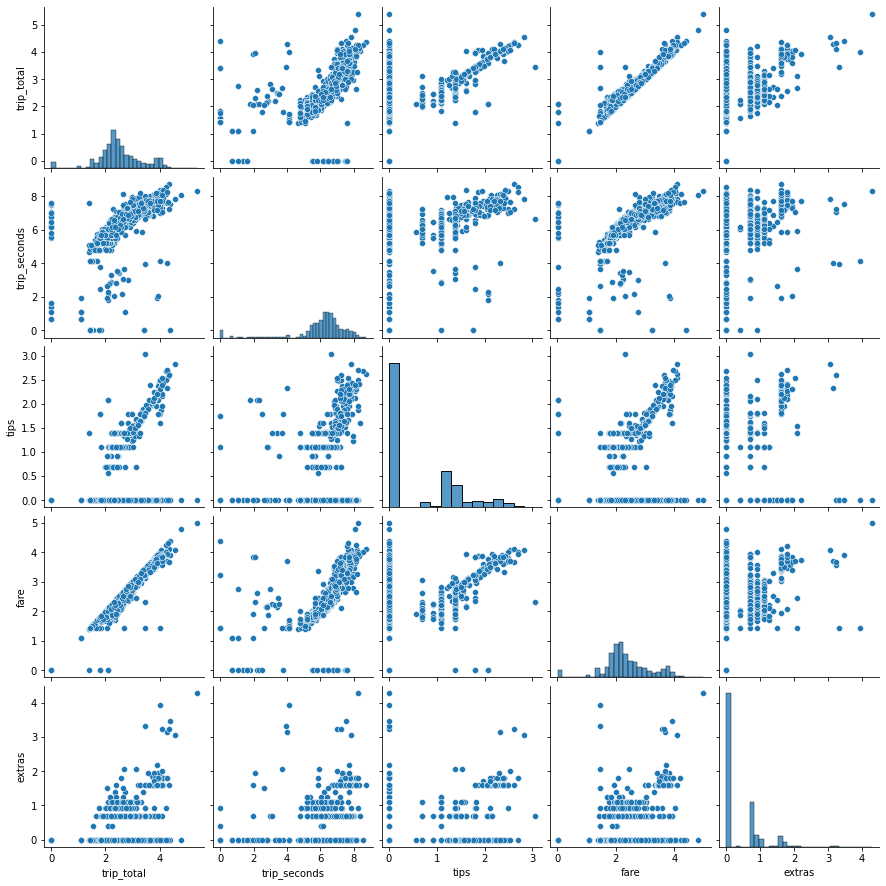

In [33]:
#Crear al df de logaritmos

log_num_df= num_df

#aplicamos logaritmos a todas las variables
log_num_df = log_num_df.apply(lambda x: np.log(x+1) )

cols = ["trip_total" , "trip_seconds", "tips", "fare", "extras"]
sns.pairplot (data = log_num_df[cols]) #Relacion de columan con las restantes


<AxesSubplot:>

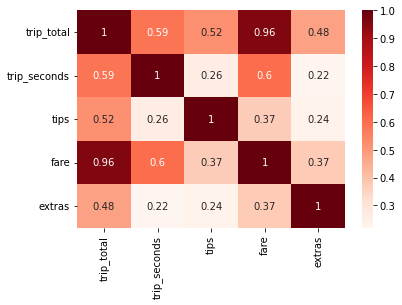

In [34]:
correlations = log_num_df[cols].corr()
sns.heatmap (correlations, cmap = "Reds", annot= True)


Scaler - MinMax scaler
Scaler - Standard scaler

MinMax
X´= (X-Xmin)/(Xmax-Xmin)

In [32]:
x = num_df['trip_seconds']
x_min= x.min()
x_max= x.max()

print(x)
print(x_min)
print(x_max)

0       600
1       960
2      3000
3      2220
4      1560
       ... 
995    2040
996     480
997    1260
998     720
999     960
Name: trip_seconds, Length: 1000, dtype: Int64
0
6240


In [33]:
x_scaled = (x-x_min)/(x_max-x_min)

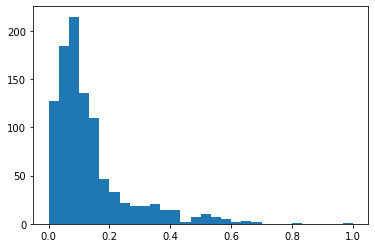

In [35]:
plt.hist(x_scaled, bins=30);

std_scaler
X' = (x-media)/desviacion_estandar

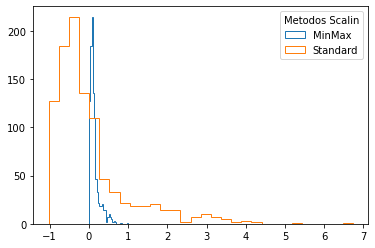

In [40]:
x = num_df['trip_seconds']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
scaler = MinMaxScaler() #Creamos el modelo
min_max_scaler = scaler.fit(num_df[cols]) #Entrenamos el modelo
data_min_max_scaler= min_max_scaler.transform(num_df[cols]) #Se transforman los datos

print(data_min_max_scaler)

[[0.04258261 0.09615385 0.1        0.04648596 0.        ]
 [0.09903682 0.15384615 0.         0.14821712 0.        ]
 [0.17046869 0.48076923 0.         0.25512104 0.        ]
 ...
 [0.10733214 0.20192308 0.19       0.13097455 0.        ]
 [0.04258261 0.11538462 0.         0.06372853 0.        ]
 [0.07484216 0.15384615 0.         0.11200772 0.        ]]


In [46]:
num_df_minmax_scaled = pd.DataFrame(columns=num_df[cols].columns, data=data_min_max_scaler)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


#4. Realizar el estudio de correlaciones de datos de MinMaxScarler y StandarScaler

In [ ]:
correlations = num_df_minmax_scaled[cols].corr()
sns.heatmap (correlations, cmap = "Reds", annot= True)